# Лабораторная №1: КЛИЕНТ-СЕРВЕРНАЯ АРХИТЕКТУРА

## Применение клиент-серверной архитектуры для передачи изображения с импульсным шумом (salt and peper)

Импорты

In [1]:
import cv2

from Server import Server
from Noise import Noise
from Client import Client

Инициализация IP хоста и портов коммуникации:
NOISE_PORT - коммуникация между Client и Noise;
SERVER_PORT - коммуникаци между Noise и Server

In [2]:
HOST = '127.0.0.1'
NOISE_PORT = 55555
SERVER_PORT = 55556

Чтение оригинального изображения (представлен ниже)

In [3]:
img = cv2.imread('images/original.jpg')

Запуск потока Server

In [4]:
server = Server(HOST, SERVER_PORT)
server.start()

Server: Подключение к порту 55556


Запуск потока Noise

In [5]:
noise = Noise(HOST, NOISE_PORT, SERVER_PORT, use_numba=True)
noise.start()

Noise: Подключение к порту 55555


Запуск потока Client

In [6]:
client = Client(HOST, NOISE_PORT, img)
client.start()
server.join()

Client: Подключение к порту 55555
Client: Подключено. Отправка изображения.
Noise: Подключено. Получение изображения.
Client: Изображение отправлено.
Noise: Принято изображение размером 1280x720 и кол-вом байт 2764800
Noise: Начало параллельной генерации шума
Noise: Параллельная генерация шума завершена за 1.7191553115844727 секунд
Server: Подключено. Получение изображения.
Noise: Изображение отправлено.
Noise: Изображение отправлено.
Server: Принято изображение размером 1280x720 и кол-вом байт 2764800
Server: Принято изображение размером 1280x720 и кол-вом байт 2764800
Server: Сравнение оригинала с зашумленным изображением
Server: Среднее абсолютное отклонение: 15.462550163269043
Server: Среднеквадратичное отклонение: 3229.796630859375
Server: Сравнение оригинала с восстановленным изображением
Server: Среднее абсолютное отклонение: 49.21356964111328
Server: Среднеквадратичное отклонение: 11614.509765625


### Оригинальное изображение

In [7]:
import matplotlib.pyplot as plt

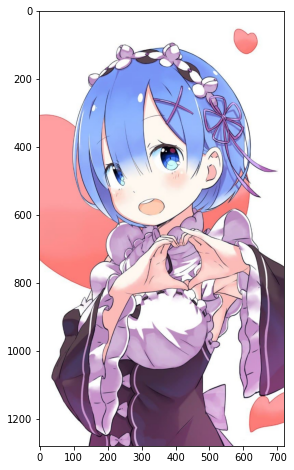

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(img[...,::-1])

### Зашумлённое изображение

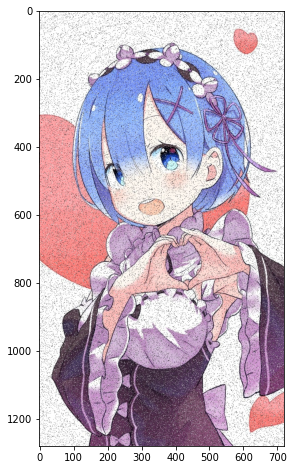

In [9]:
noise_img = cv2.imread('images/noise.jpg')
plt.figure(figsize=(8, 8))
plt.imshow(noise_img[...,::-1])

### Восстановленное изображение

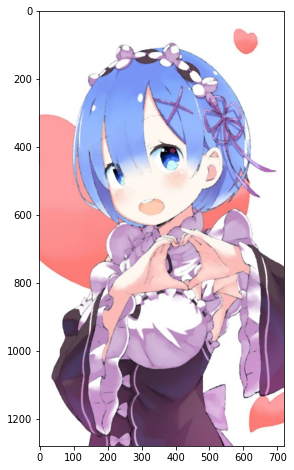

In [10]:
result_img = cv2.imread('images/result.jpg')
plt.figure(figsize=(8, 8))
plt.imshow(result_img[...,::-1])